## L2 and L1 regularization for linear estimators

In [2]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

print(boston.keys())
print(boston.data.shape)

print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
   

In [3]:
import numpy as np
import pandas as pd
 
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Ex. 1 Split train-test dataset**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bos, boston.target, test_size=0.2, shuffle=True, random_state=10)

In [5]:
print(bos.shape[0])
print(float(X_train.shape[0]) / float(bos.shape[0]))
print(float(X_test.shape[0]) / float(bos.shape[0]))

506
0.7984189723320159
0.2015810276679842


**Ex. 2 Linear regression**

In [6]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)    # Fit a model based on X_train and Y_train
y_pred = regr.predict(X_test) # Predict the X_test and store the prediction values into Y_pred

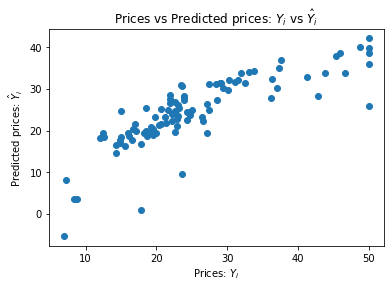

In [7]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

**How should an ideal scatter look like?**

I think it the points should be in a straight line `y = x` - so predicted prices exactly match the actual ones

Ex. 3: To check the level of error of a model calculate the Mean Squared Error.

In [8]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

34.413968453138516

Ex. 4: Calculate the model.score. Check what it is for linear problems.

In [9]:
regr.score(X_test, y_test)

0.6709339839115633

67% is really low. It should be at least 80-90% for linear problems

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
polynomial_features = PolynomialFeatures(degree=2)
polynomial_features

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [11]:
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.fit_transform(X_test)

X_train2 = polynomial_features.fit_transform(X_train, y_train)
X_test2 = polynomial_features.fit_transform(X_test, y_test)
regr2 = LinearRegression()
regr2.fit(X_train2, y_train)    
y_pred2 = regr2.predict(X_test2)

In [12]:
regr2.score(X_test2, y_test)

0.8749973786112869

And now the accuracy raised to 87%

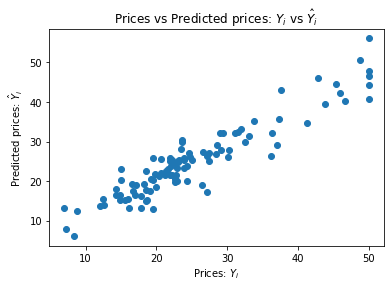

In [13]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred2)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

Also the plot is closer to a straight line

**Ex. 5: Lasso**

In [14]:
from sklearn.linear_model import Ridge, Lasso

lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)
print('Test set score')
lasso_reg.score(X_test, y_test)

Test set score


0.5350073630794525

In [15]:
print('Train set score')
lasso_reg.score(X_train, y_train)

Train set score


0.6887196863683032

In [16]:
alphas = [10**i for i in range(-5, 5, 1)]
lasso_test_scores = []
lasso_train_scores = []

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    lasso_test_scores.append(lasso_reg.score(X_test, y_test))
    lasso_train_scores.append(lasso_reg.score(X_train, y_train))

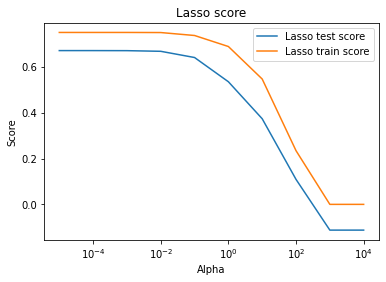

In [17]:
plt.semilogx(alphas, lasso_test_scores, label='Lasso test score')
plt.semilogx(alphas, lasso_train_scores, label='Lasso train score')
plt.title('Lasso score')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.legend()

**Ex 6. Ridge**

In [18]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
ridge_reg.score(X_test, y_test)

0.6655627286231771

In [19]:
ridge_reg.score(X_train, y_train)

0.7480131375144308

In [20]:
alphas = [10**i for i in range(-2, 10, 1)]
ridge_test_scores = []
ridge_train_scores = []

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    ridge_test_scores.append(ridge_reg.score(X_test, y_test))
    ridge_train_scores.append(ridge_reg.score(X_train, y_train))

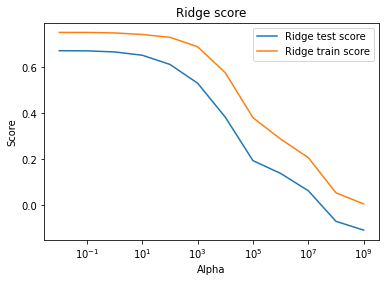

In [21]:
plt.semilogx(alphas, ridge_test_scores, label='Ridge test score')
plt.semilogx(alphas, ridge_train_scores, label='Ridge train score')
plt.title('Ridge score')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.legend()

## Regularization for logistic regression

In [22]:
from sklearn.datasets import load_breast_cancer

import pandas as pd
data = load_breast_cancer()
df = pd.DataFrame(data.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Ex 1. Check if there are nulls. Please fill the missing values with mean values for giving class.

In [24]:
df.isnull().values.any()

False

So there are no nulls

In [25]:
df.fillna(df.mean())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Ex. 2: Divide the dataset into training and testing. Remove the first column containing the ID of the examined person. **I cannot see any ID column here (?)**

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.values, data.target, test_size=0.2, random_state=10)

Ex. 3

In [27]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=200)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.9298245614035088

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


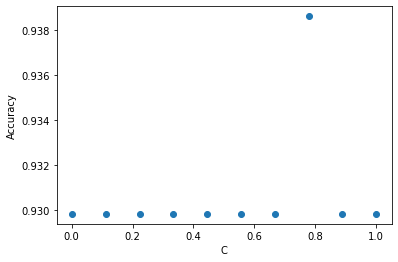

In [28]:
c_list = np.linspace(0.001, 1.0, num=10)
accuracy_list = []
for c in c_list:
    reg = LogisticRegression(penalty='l2', C=c).fit(X_train, y_train)
    accuracy_list.append(reg.score(X_test, y_test))
plt.scatter(c_list, accuracy_list)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

## Regularization for kNN method

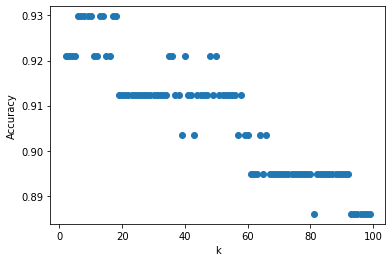

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# NOTE: this introduces offset of 2 between k and list index
k_list = list(range(2, 100))
accuracy_list = []

for k in k_list:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X = X_train, y = y_train)
    y_pred = model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))
plt.scatter(k_list, accuracy_list)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [30]:
print('Best accuracy:', max(accuracy_list))
k = accuracy_list.index(max(accuracy_list)) + 2 # k has offset of 2
print('For k =', k)

Best accuracy: 0.9298245614035088
For k = 6


## Decision trees optimization

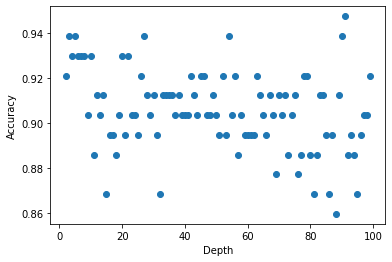

In [31]:
from sklearn.tree import DecisionTreeClassifier

# NOTE: this introduces offset of 2 between depth and list index
depth_list = list(range(2, 100))
accuracy_list = []

for depth in depth_list:
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))
plt.scatter(depth_list, accuracy_list)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [32]:
print('Best accuracy:', max(accuracy_list))
depth = accuracy_list.index(max(accuracy_list)) + 2
print('For depth =', depth)

Best accuracy: 0.9473684210526315
For depth = 91
